In [1]:
import tifffile
import cv2
import os
from pathpretrain.utils import generate_tissue_mask
import scipy.ndimage as ndimage
import pandas as pd
import numpy as np
from skimage.util import compare_images
from skimage.measure import regionprops_table
from skimage import exposure
import pickle
import matplotlib.pyplot as plt
import matplotlib; matplotlib.rcParams['figure.dpi']=300
from tqdm import tqdm

In [5]:
! pwd

/Users/luyunrui/Desktop/Dartmouth/metals_app


In [2]:
matrix_list = ['SP19_31508_A3 Ag109_ppm matrix.xlsx',
'SP19_31508_A3 Mg24_ppm matrix.xlsx',
'SP19_31508_A3 Al27_ppm matrix.xlsx',
'SP19_31508_A3 Mn55_ppm matrix.xlsx',
'SP19_31508_A3 As75_ppm matrix.xlsx',
'SP19_31508_A3 Mo98_ppm matrix.xlsx',
'SP19_31508_A3 Ba138_ppm matrix.xlsx',
'SP19_31508_A3 Na23_ppm matrix.xlsx',
'SP19_31508_A3 Ca44_ppm matrix.xlsx',
'SP19_31508_A3 Ni60_ppm matrix.xlsx',
'SP19_31508_A3 Cd111_ppm matrix.xlsx',
'SP19_31508_A3 PbTotal_ppm matrix.xlsx',
'SP19_31508_A3 Co59_ppm matrix.xlsx',
'SP19_31508_A3 Pt196_ppm matrix.xlsx',
'SP19_31508_A3 Cr52_ppm matrix.xlsx',
'SP19_31508_A3 Ru102_ppm matrix.xlsx',
'SP19_31508_A3 Cu65_ppm matrix.xlsx',
'SP19_31508_A3 Sb123_ppm matrix.xlsx',
'SP19_31508_A3 Fe56_ppm matrix.xlsx',
'SP19_31508_A3 Se80_ppm matrix.xlsx',
'SP19_31508_A3 Fe57_ppm matrix.xlsx',
'SP19_31508_A3 Tl205_ppm matrix.xlsx',
'SP19_31508_A3 Gd156_ppm matrix.xlsx',
'SP19_31508_A3 V51_ppm matrix.xlsx',
'SP19_31508_A3 K41_ppm matrix.xlsx',
'SP19_31508_A3 Zn66_ppm matrix.xlsx',]

In [20]:
to_save_dict = {}
for one_matrix_path in tqdm(matrix_list):
    WS = pd.read_excel('./data/colon/'+one_matrix_path)
    to_save_dict[one_matrix_path[14:-16]] = np.array(WS)
with open('colon_metals.pkl', 'wb') as handle:
    pickle.dump(to_save_dict, handle)

100%|████████████████████████████████████████████████| 26/26 [06:58<00:00, 16.11s/it]


In [21]:
to_save_dict.keys()

dict_keys(['Ag109', 'Mg24', 'Al27', 'Mn55', 'As75', 'Mo98', 'Ba138', 'Na23', 'Ca44', 'Ni60', 'Cd111', 'PbTotal', 'Co59', 'Pt196', 'Cr52', 'Ru102', 'Cu65', 'Sb123', 'Fe56', 'Se80', 'Fe57', 'Tl205', 'Gd156', 'V51', 'K41', 'Zn66'])

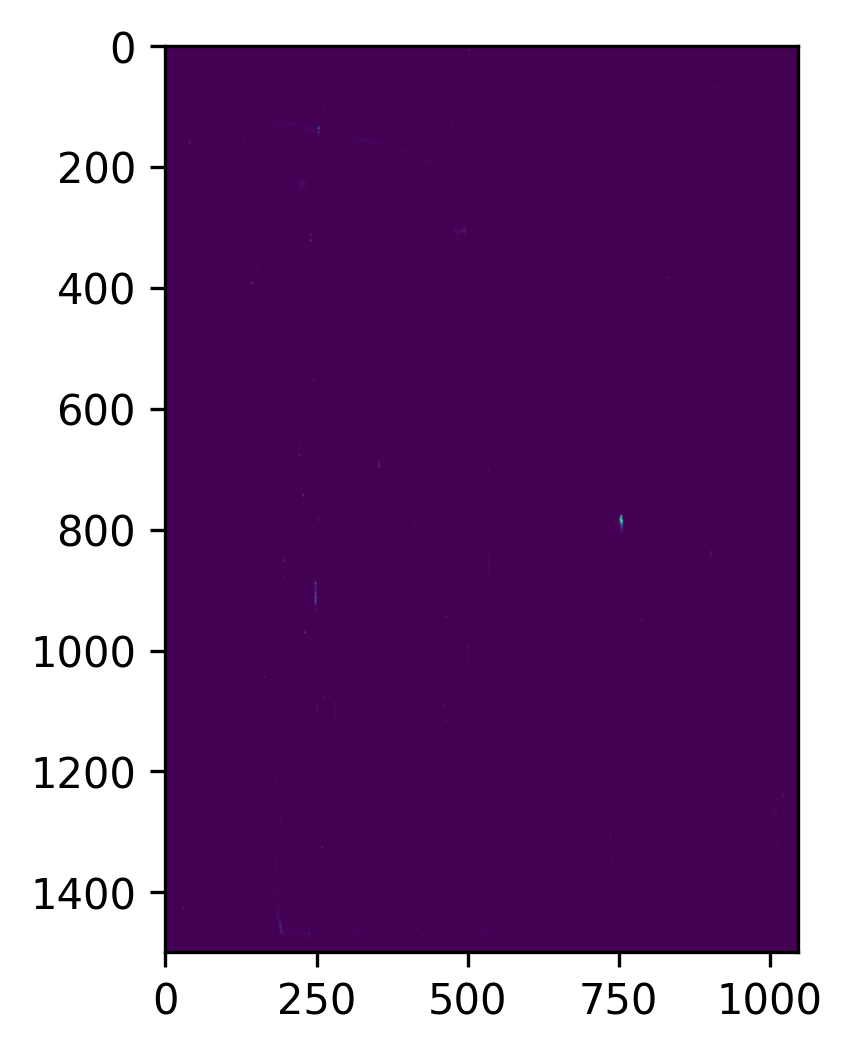

In [22]:
plt.imshow(to_save_dict['PbTotal'])
plt.show()

In [ ]:
del to_save_dict['PbTotal']

In [ ]:
with open('filename.pickle', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [3]:
WS = pd.read_excel('./data/colon/SP19_31508_A3 Cu65_ppm matrix.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: './data/colon/SP19_31508_A3 Cu65_ppm matrix.xlsx'

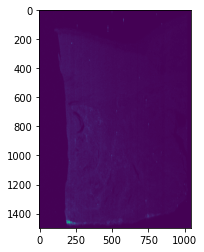

In [6]:
plt.imshow(WS)
plt.show()

In [15]:
WS.shape

(1499, 1047)

In [9]:
'SP19_31508_A3 Ag109_ppm matrix.xlsx'[14:-16]

'Ag109'

In [10]:
image = tifffile.imread('./data/H_E_resized.tiff')

In [12]:
image.shape

(1499, 1047, 3)

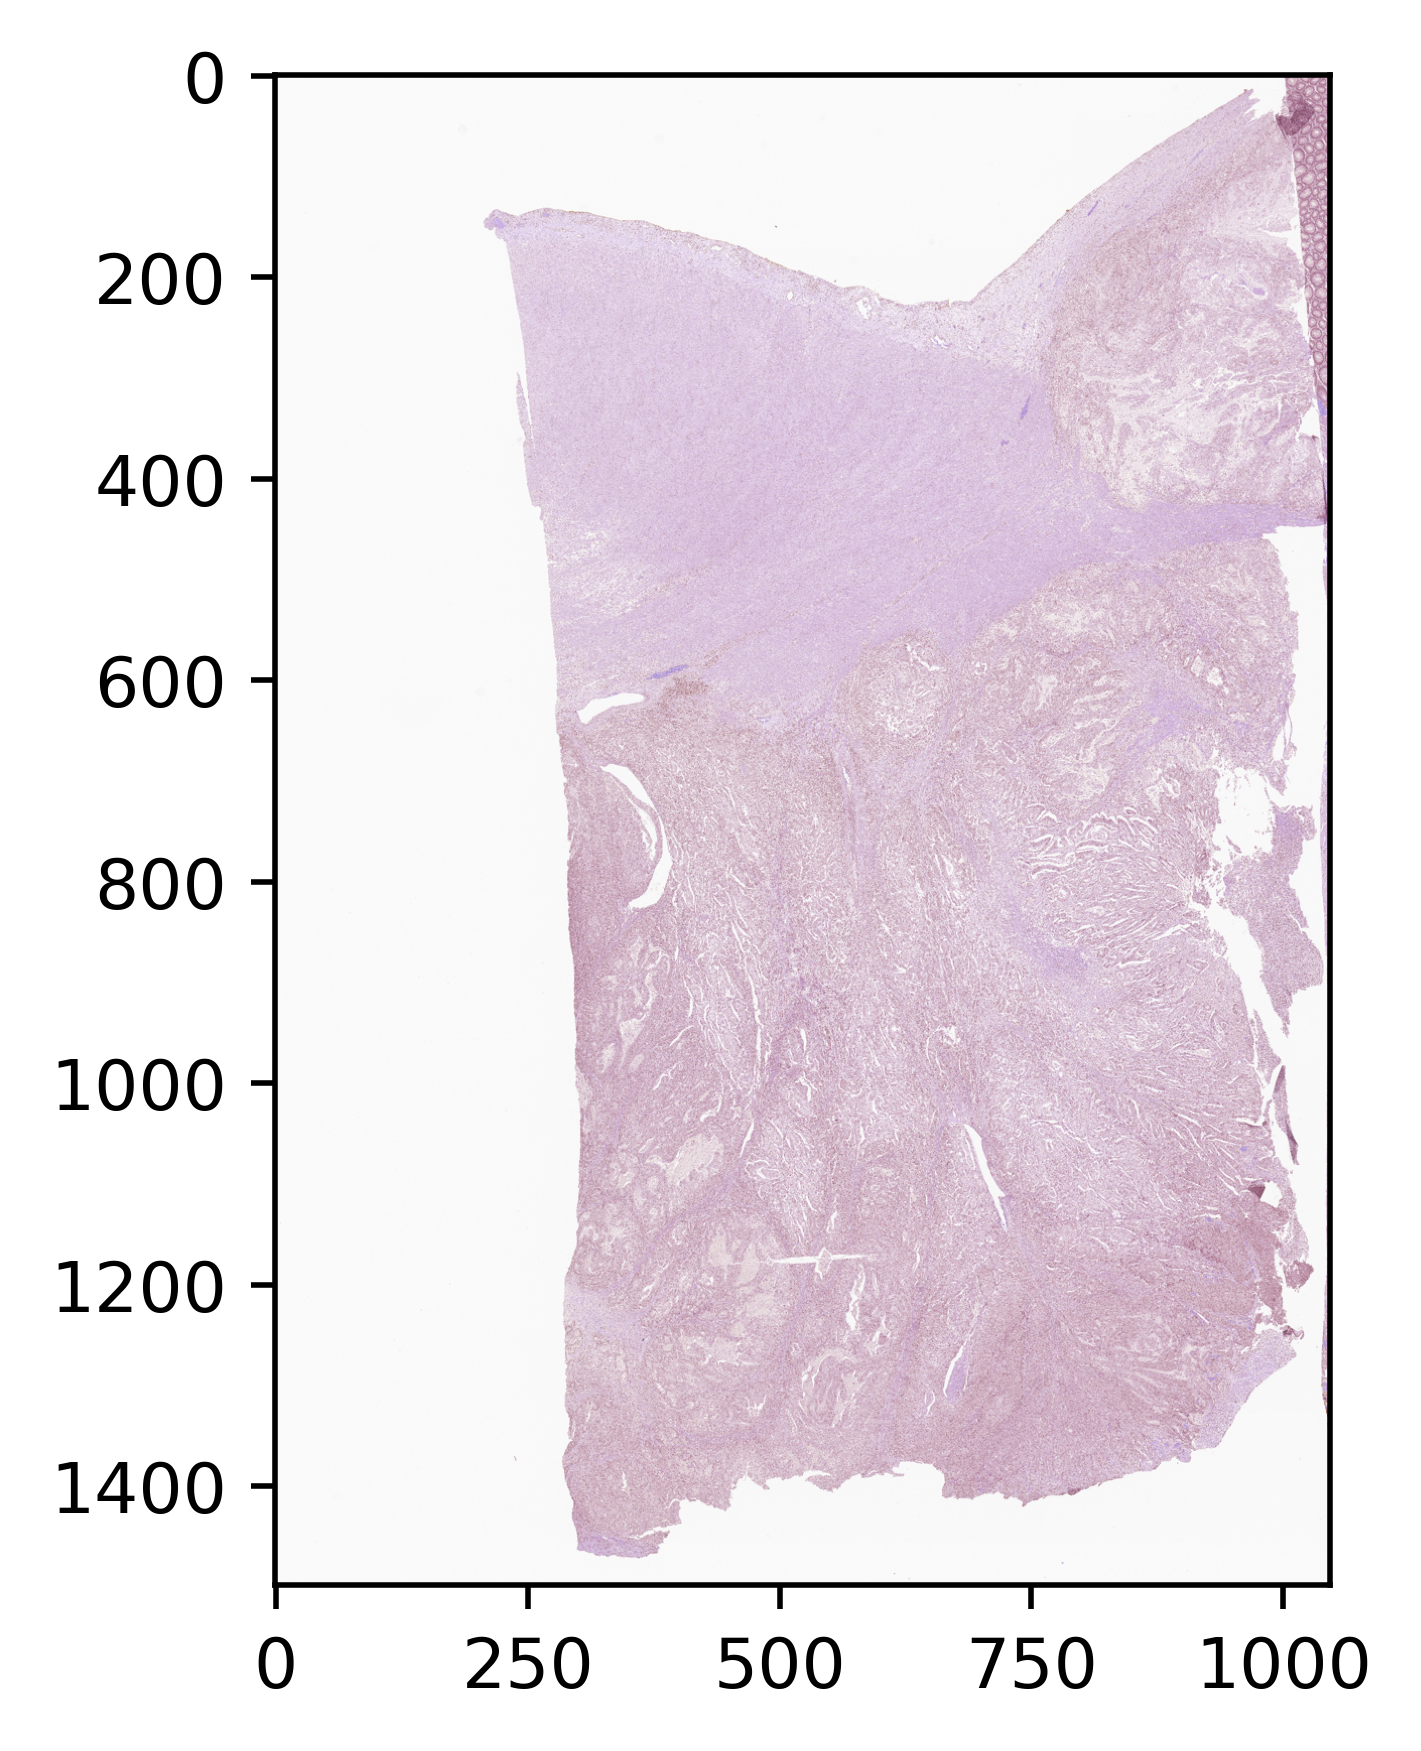

In [17]:
plt.imshow(image)